# **Exploratory Data Analysis**


**Data Cleaning Process**

The data cleaning process involves preparing three datasets—Customers.csv, Products.csv, and Transactions.csv—for analysis by resolving missing values, duplicates, and inconsistencies. Missing values in the Customers dataset (e.g., CustomerName and Region) are replaced with "Unknown," while missing Price values in the Products dataset are filled with the mean to ensure completeness. Rows with missing TotalValue in the Transactions dataset are removed to maintain accurate financial records. Duplicate rows across all datasets are eliminated to retain unique records and avoid redundancy. Date columns such as SignupDate and TransactionDate are converted to datetime format for precise time-based calculations.

The cleaned datasets are validated using the info() method to confirm the absence of missing values and ensure correct data types. Post-cleaning, the datasets are saved as new files (Cleaned_Customers.csv, Cleaned_Products.csv, and Cleaned_Transactions.csv) for further analysis. This systematic cleaning ensures the datasets are consistent, reliable, and ready for tasks such as exploratory data analysis (EDA), clustering, and modeling. By standardizing and verifying the data, this process establishes a solid foundation for generating accurate insights and meaningful outcomes.

In [ ]:
import pandas as pd

# Load your datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

print("Customers Data:")
print(customers.head())
print("\nProducts Data:")
print(products.head())
print("\nTransactions Data:")
print(transactions.head())

print("Missing values in Customers Data:")
print(customers.isnull().sum())
print("\nMissing values in Products Data:")
print(products.isnull().sum())
print("\nMissing values in Transactions Data:")
print(transactions.isnull().sum())

customers.fillna({'CustomerName': 'Unknown', 'Region': 'Unknown'}, inplace=True)
products['Price'].fillna(products['Price'].mean(), inplace=True)
transactions.dropna(subset=['TotalValue'], inplace=True)

customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

print("\nCleaned Customers Data:")
print(customers.info())
print("\nCleaned Products Data:")
print(products.info())
print("\nCleaned Transactions Data:")
print(transactions.info())

customers.to_csv('/content/Cleaned_Customers.csv', index=False)
products.to_csv('/content/Cleaned_Products.csv', index=False)
transactions.to_csv('/content/Cleaned_Transactions.csv', index=False)

print("Data cleaning complete and files saved!")


Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127 

<ipython-input-4-4295102802e6>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['Price'].fillna(products['Price'].mean(), inplace=True)


**Descriptive Statistics:**

The descriptive statistics uncover notable trends in the Products, Transactions, and Customers datasets. In the Products dataset, prices range from $16.08 to $497.76, with an average price of $267.55 and a standard deviation of $143.22, indicating moderate variability. Of the 100 unique products, Books and Electronics lead the categories with 26 products each, followed closely by Clothing and Home Decor. These trends suggest a stronger emphasis on Books and Electronics, potentially aligning with customer preferences or business priorities.

The Transactions dataset shows a wide range of transaction values, from $16.08 to $1,991.04, with an average of $689.99, reflecting diverse purchasing behavior. In the Customers dataset, South America has the largest representation, accounting for 59 out of 200 customers, while Europe, North America, and Asia show relatively balanced participation. Notable activity includes customer C0109, who completed 11 transactions, and product P059, purchased 19 times. These insights can support data-driven strategies such as targeted marketing, customer segmentation, and optimizing inventory for high-demand products and regions.


In [ ]:
import pandas as pd

customers = pd.read_csv('Cleaned_Customers.csv')
products = pd.read_csv('Cleaned_Products.csv')
transactions = pd.read_csv('Cleaned_Transactions.csv')

print("Descriptive Statistics for Products Data:")
print(products.describe(include=[np.number]))

print("\nDescriptive Statistics for Transactions Data:")
print(transactions.describe(include=[np.number]))

print("\nDescriptive Statistics for Customers Data:")
print(customers.describe(include=[object, 'category']))

print("\nDescriptive Statistics for Products Data (Categorical):")
print(products.describe(include=[object, 'category']))

print("\nDescriptive Statistics for Transactions Data (Categorical):")
print(transactions.describe(include=[object, 'category']))

print("\nFrequency Counts for Customer Regions:")
print(customers['Region'].value_counts())

print("\nFrequency Counts for Product Categories:")
print(products['Category'].value_counts())


Descriptive Statistics for Products Data:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000

Descriptive Statistics for Transactions Data:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000

Descriptive Statistics for Customers Data:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59       

# Data Visualization and Business Insights

## 1. Distribution of Product Prices
- **Observation**: Product prices range from $16 to $500, with a concentration around $300-$400.
- **Insight**: The pricing strategy caters to mid-range customers, with potential opportunities to target budget and premium buyers.

## 2. Distribution of Quantity Sold
- **Observation**: Quantities sold per transaction are evenly distributed between 1 and 4 items.
- **Insight**: Customers often purchase multiple items, suggesting opportunities for cross-selling or bulk discounts.

## 3. Box Plots of Product Prices and Transaction Values
- **Observation**: Product prices and transaction values show wide ranges, with transaction values peaking around $1,000.
- **Insight**: High transaction values indicate opportunities to target high-value customers with personalized offers.

## 4. Customer Distribution by Region
- **Observation**: South America has the largest customer base, followed by Europe, North America, and Asia.
- **Insight**: Focus on South America for marketing while exploring growth opportunities in other regions.

## 5. Product Distribution by Category
- **Observation**: Books and Electronics dominate product categories, with balanced representation across all categories.
- **Insight**: Expand inventory and promotions in Books and Electronics while diversifying Home Decor and Clothing.

## 6. Relationship Between Price and Quantity Sold
- **Observation**: Quantities sold remain steady across all price ranges, including high-priced items.
- **Insight**: High-priced products sell in bulk, highlighting the importance of balancing affordability with premium offerings.

# Business Insights
1. Focus marketing efforts in South America and explore growth in other regions.
2. Cater to mid-range pricing while targeting budget and premium segments.
3. Promote cross-selling and bulk discounts to maximize transaction sizes.
4. Expand Books and Electronics offerings and target high-value customers with personalized campaigns.

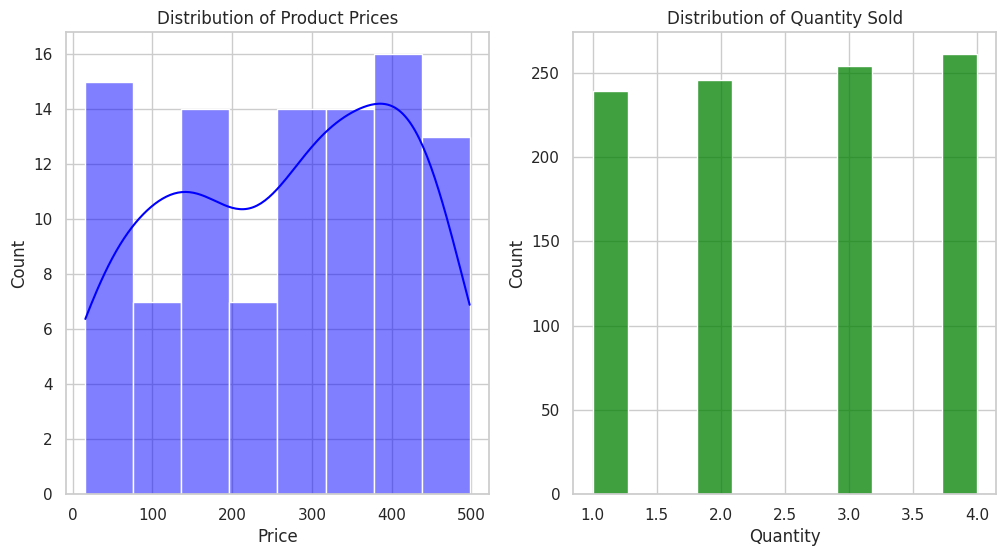

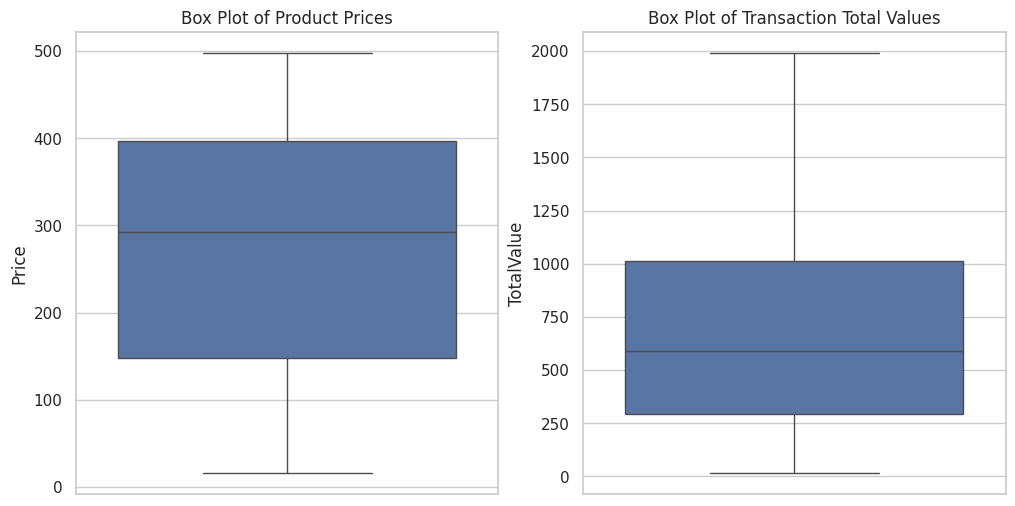

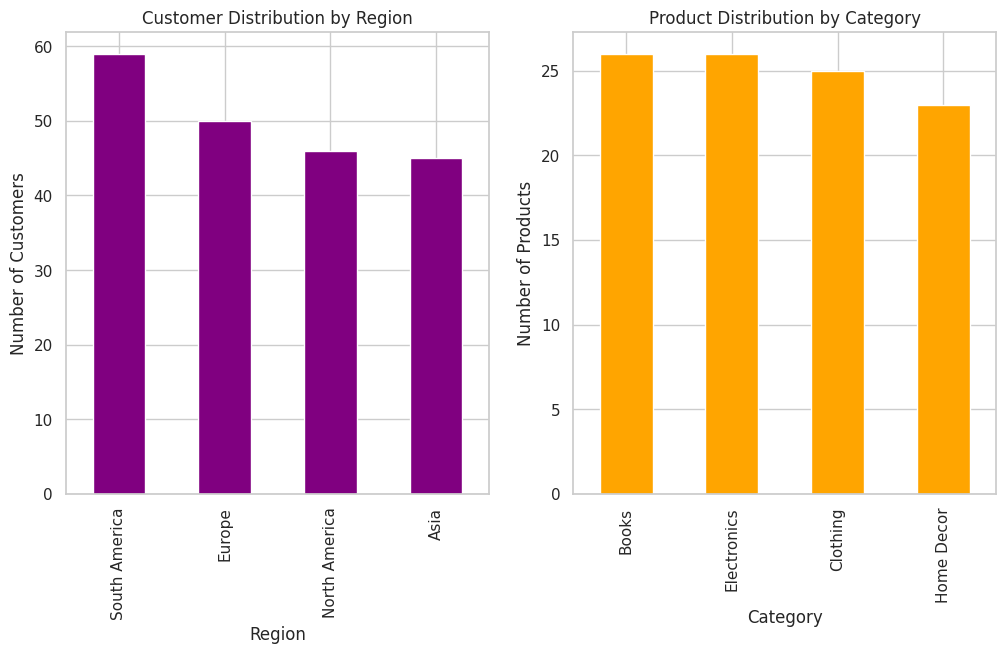

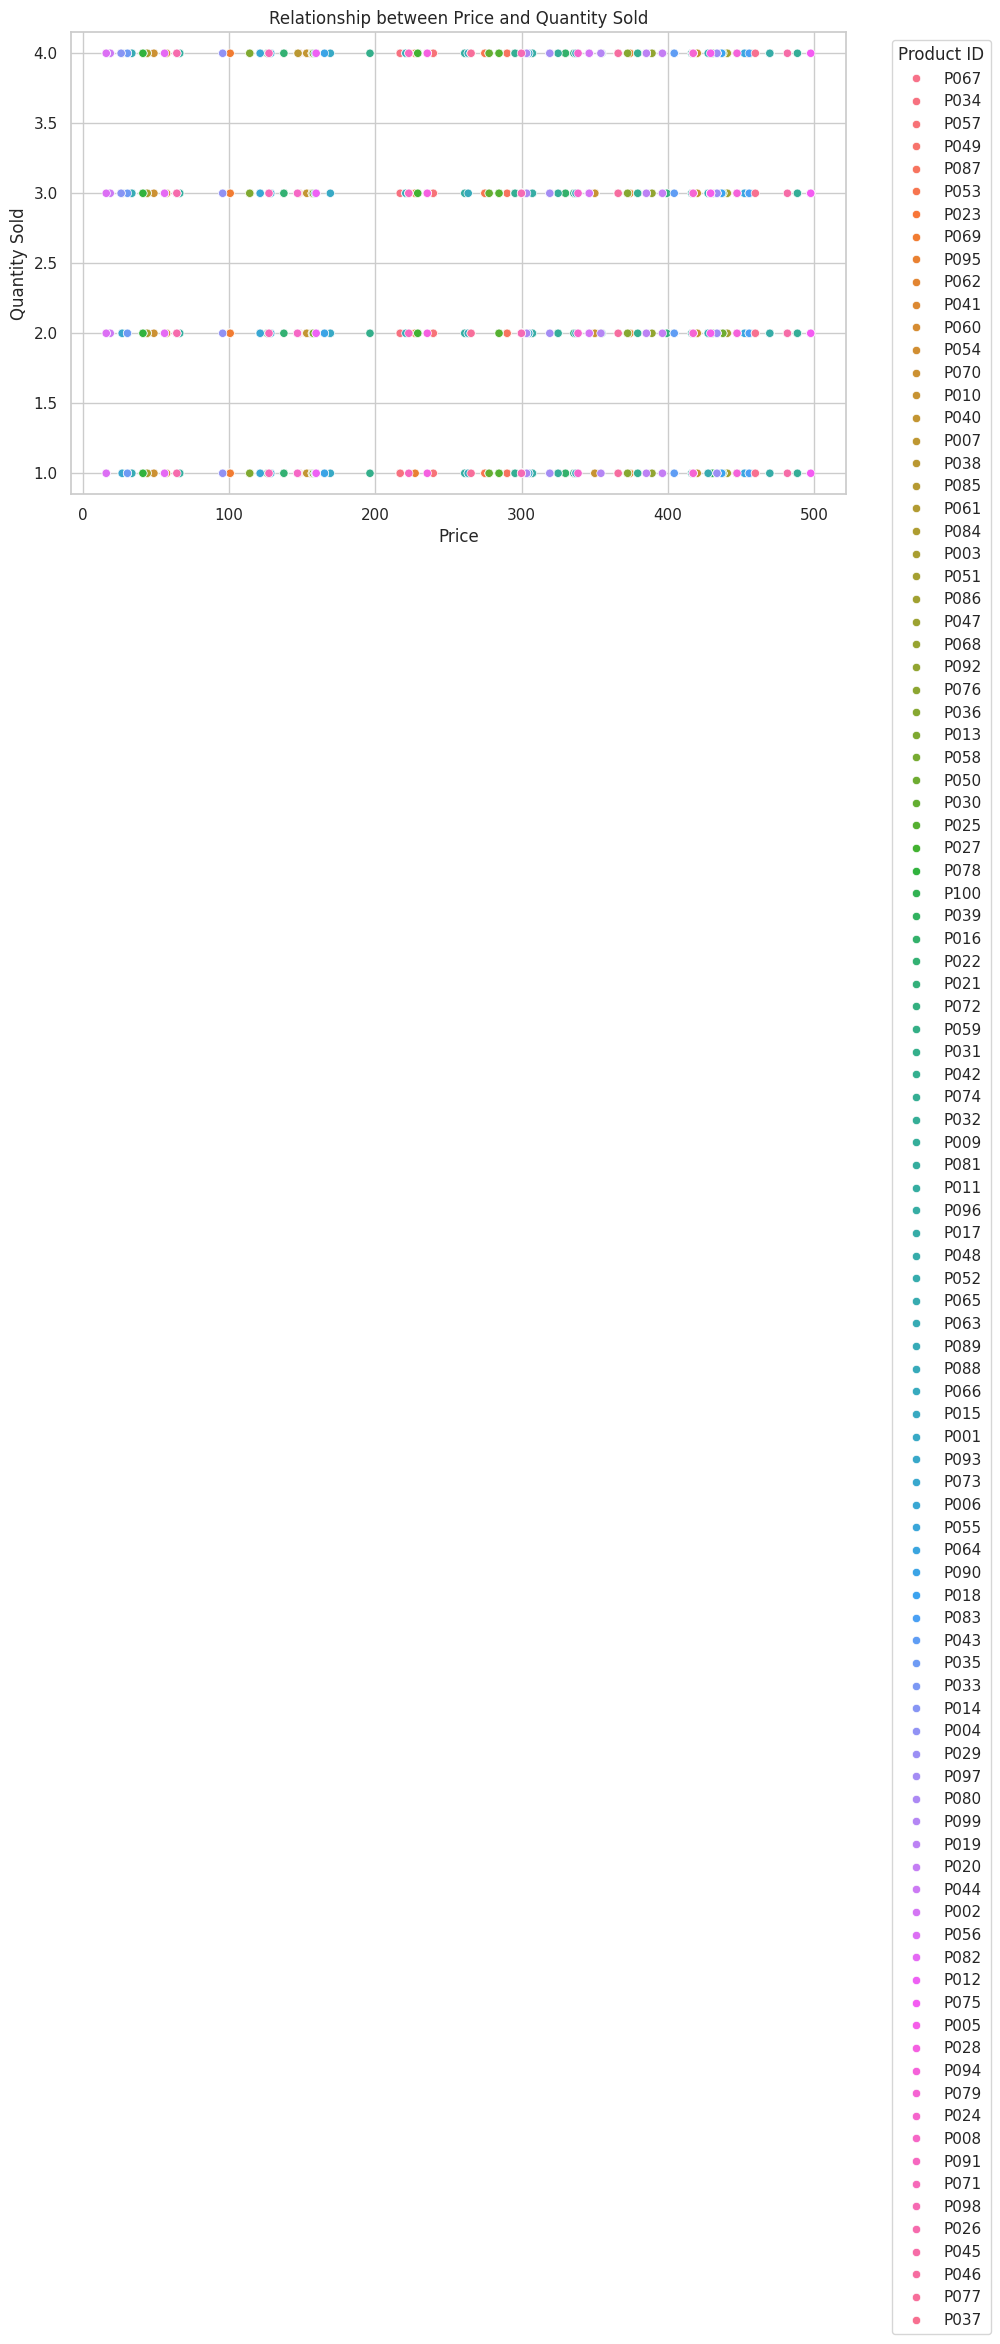

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Cleaned_Customers.csv')
products = pd.read_csv('Cleaned_Products.csv')
transactions = pd.read_csv('Cleaned_Transactions.csv')

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(products['Price'], kde=True, color='blue')
plt.title('Distribution of Product Prices')

plt.subplot(1, 2, 2)
sns.histplot(transactions['Quantity'], kde=False, color='green')
plt.title('Distribution of Quantity Sold')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=products['Price'])
plt.title('Box Plot of Product Prices')

plt.subplot(1, 2, 2)
sns.boxplot(y=transactions['TotalValue'])
plt.title('Box Plot of Transaction Total Values')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
customers['Region'].value_counts().plot(kind='bar', color='purple')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')

plt.subplot(1, 2, 2)
products['Category'].value_counts().plot(kind='bar', color='orange')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Quantity', data=transactions, hue='ProductID')
plt.title('Relationship between Price and Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.legend(title='Product ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Bivariate and Multivariate Analysis

## 1. Correlation Matrix of Transactions Data
- **Observation**: The heatmap shows a strong positive correlation (0.72) between `Price` and `TotalValue`.
- **Observation**: `Quantity` positively correlates with `TotalValue` (0.61), indicating higher quantities and prices drive transaction values.
- **Observation**: `Price` and `Quantity` show no significant correlation (-0.01), suggesting independent behaviors.
- **Insight**: Both price and quantity significantly impact transaction value but are not directly related to each other.

## 2. Scatter Plot of Price vs Quantity Sold
- **Observation**: Quantity sold remains consistent (1 to 4) across different price ranges.
- **Insight**: Higher-priced products sell in similar quantities as lower-priced products, reflecting steady demand for premium items.

## 3. Pair Plot of Selected Transaction Metrics
- **Observation**: The pair plot shows linear relationships between `Price`, `Quantity`, and `TotalValue`.
- **Insight**: `TotalValue` increases proportionally with both `Price` and `Quantity`, confirming their combined effect on transaction values.

## 4. Cross Tabulation between Region and Product Category
- **Observation**: The crosstab reveals distinct product category preferences across regions.
- **Insight**: Regional differences in product preferences can inform targeted inventory and marketing strategies.

# Business Implications
1. Maintain diverse price points since premium products show consistent demand across quantities.
2. Tailor marketing efforts and inventory based on regional product preferences.
3. Prioritize products that contribute to high transaction values to maximize revenue potential.

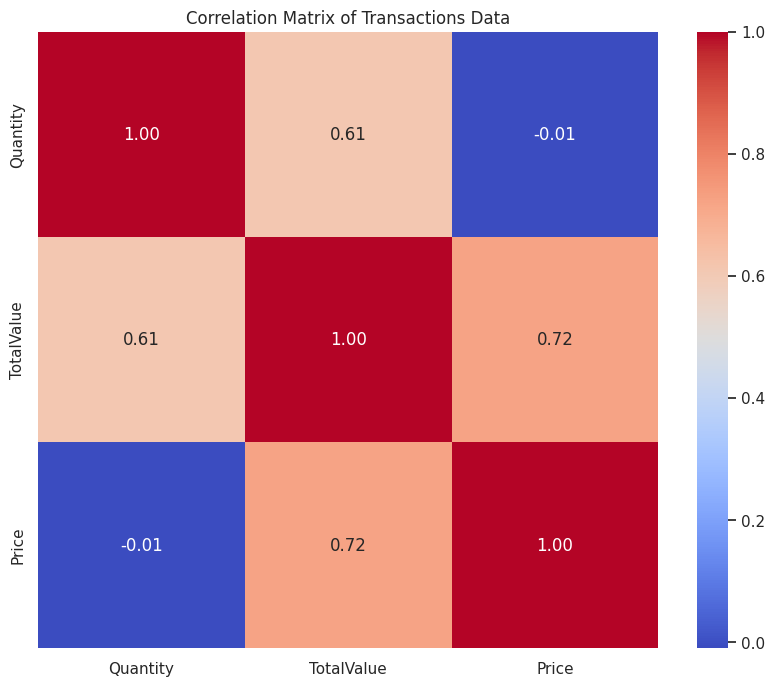


Cross Tabulation between Region and Product Category:
Category       Books  Clothing  Electronics  Home Decor
Region                                                 
Asia               6         4            4           6
Europe             7         8            6           6
North America      7         9            9           4
South America      6         4            7           7


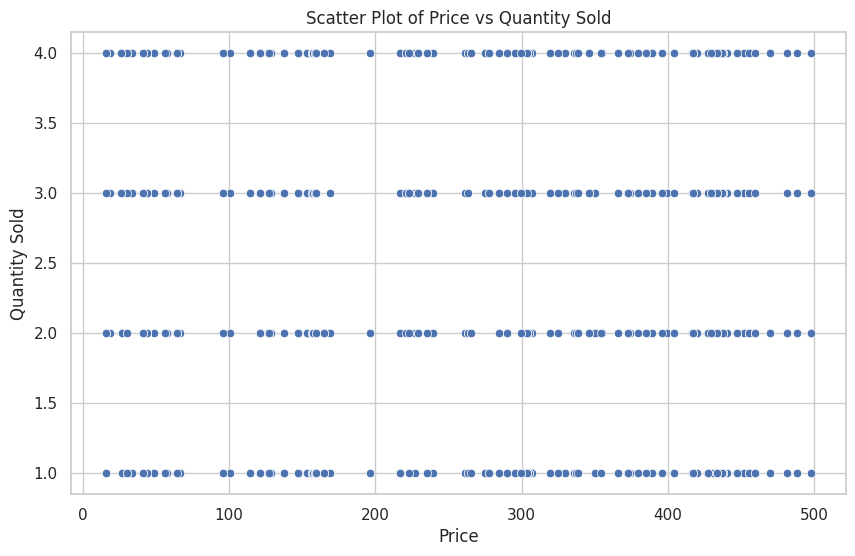

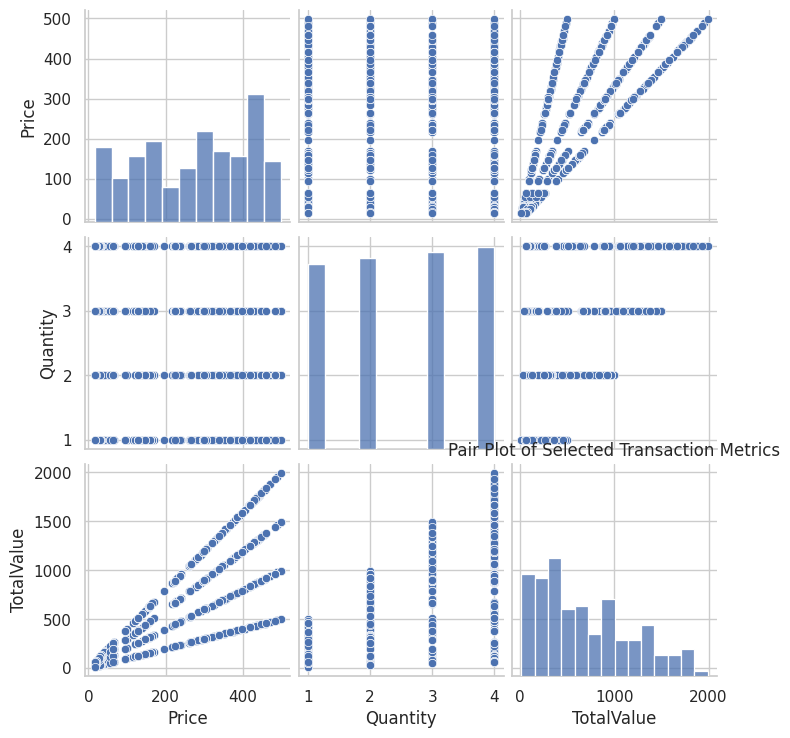

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

customers = pd.read_csv('Cleaned_Customers.csv')
products = pd.read_csv('Cleaned_Products.csv')
transactions = pd.read_csv('Cleaned_Transactions.csv')

numerical_cols = transactions.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(transactions[numerical_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Transactions Data')
plt.show()

region_category_ct = pd.crosstab(index=customers['Region'], columns=products['Category'])
print("\nCross Tabulation between Region and Product Category:")
print(region_category_ct)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=transactions, x='Price', y='Quantity')
plt.title('Scatter Plot of Price vs Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()

sns.pairplot(transactions[['Price', 'Quantity', 'TotalValue']])
plt.title('Pair Plot of Selected Transaction Metrics')
plt.show()


# Temporal Analysis - Time Series Trends

## 1. Daily Sales Trend
- **Observation**: The line plot depicts daily total sales over time, revealing fluctuations in revenue throughout the year.
- **Insight**: Sales activity is highly variable, with frequent spikes indicating peak sales days.

## 2. Observations
- **Observation**: Regular periods of increased sales are observed, likely during promotions, weekends, or holidays.
- **Insight**: Pinpointing specific dates of sales spikes can assist in optimizing marketing campaigns or inventory planning for high-demand periods.

## 3. Business Implications
1. Utilize time-series analysis to forecast future sales trends and ensure preparedness for anticipated high-demand periods.
2. Implement targeted promotions or campaigns on expected low-sales days to stabilize revenue.

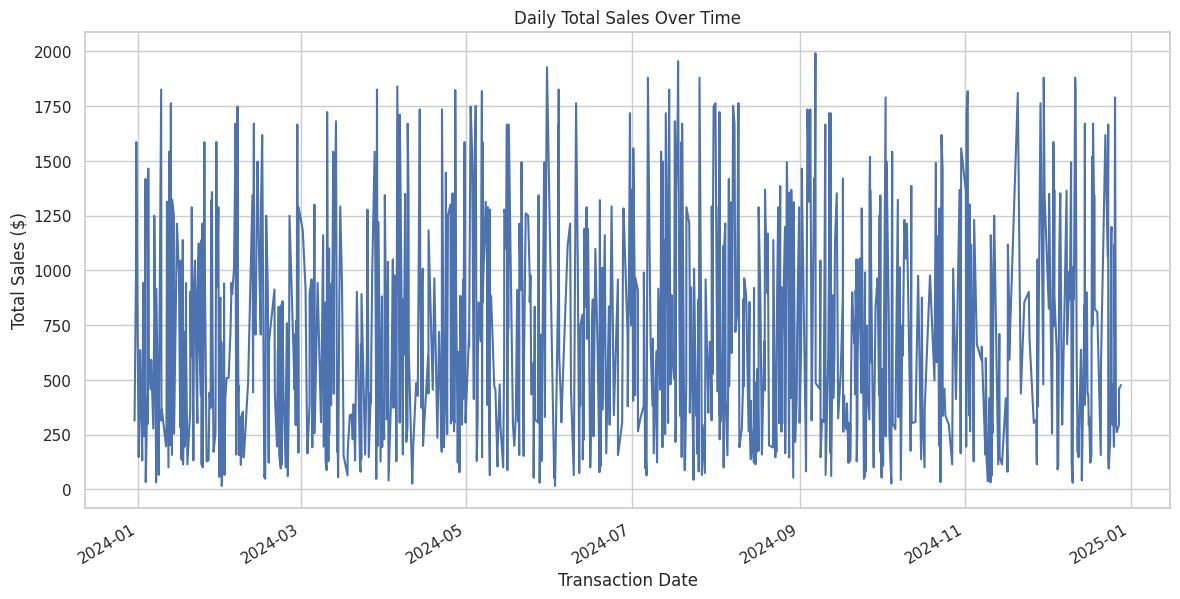

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

transactions = pd.read_csv('Cleaned_Transactions.csv')

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

daily_sales = transactions.groupby('TransactionDate')['TotalValue'].sum()

plt.figure(figsize=(14, 7))
daily_sales.plot(title='Daily Total Sales Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()


# Cohort Analysis Explanation

## 1. Retention Trends
- **Observation**: The heatmap illustrates customer retention rates across cohorts over time (measured in months after the first purchase).
- **Insight**: All cohorts start with 100% retention in the first month, with a general decline in retention in subsequent months.

## 2. Key Observations
- **Observation**: Early 2024 cohorts (e.g., March and April) exhibit higher retention rates in later months (e.g., 30%-53%).
- **Observation**: Irregular retention spikes are noted for certain months, such as May and June 2024 (e.g., 80% in June, Period 2), likely driven by successful campaigns or promotions.
- **Observation**: Recent cohorts (e.g., late 2024) show incomplete data but suggest retention drops beyond the first month.

# Business Insights
1. **Improve Early Retention**:
   - Address retention declines in the first 1-3 months post-signup.
   - Implement onboarding initiatives like discounts, loyalty programs, or personalized recommendations to improve early customer retention.

2. **Analyze Successful Cohorts**:
   - Investigate why certain cohorts (e.g., March and April 2024) perform better in later periods.
   - Recreate effective strategies, such as promotions or enhanced engagement, for new cohorts.

3. **Boost Retention During Drop-Offs**:
   - Counter retention drop-offs by re-engaging inactive customers with tailored offers or campaigns during critical decline periods.

4. **Plan Based on Seasonal Trends**:
   - Utilize months with higher retention rates (e.g., May-June 2024) for targeted campaigns and align marketing and inventory strategies accordingly.

5. **Address Data Gaps in Recent Coh

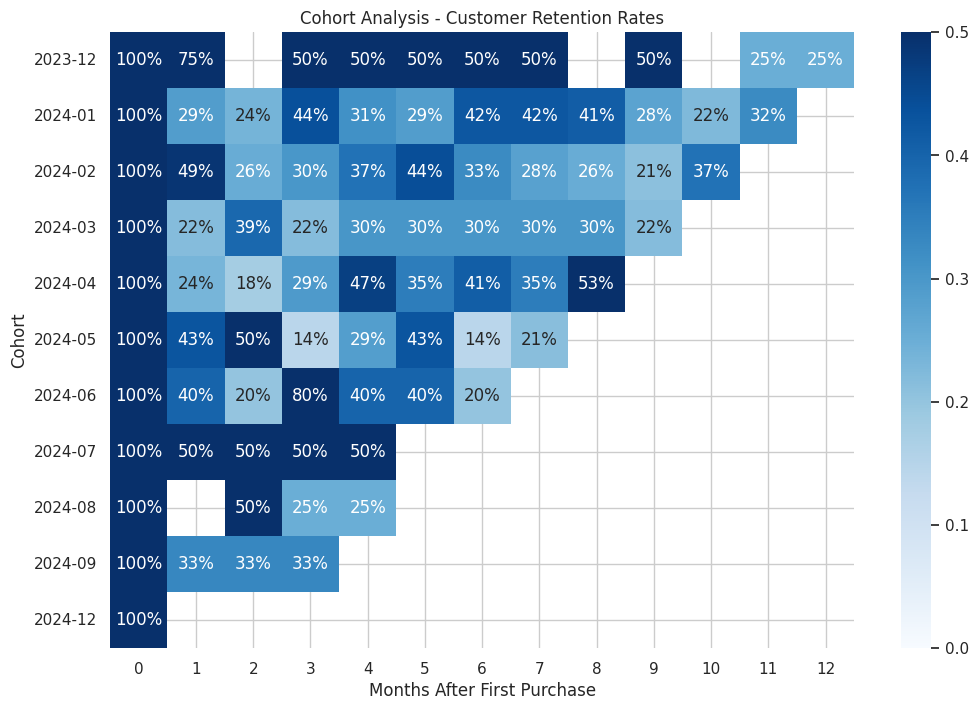

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter

customers = pd.read_csv('Cleaned_Customers.csv')
transactions = pd.read_csv('Cleaned_Transactions.csv')

customers['SignupDate'] = pd.to_datetime(customers['SignupDate']).dt.to_period('M')
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

transactions = transactions.merge(customers[['CustomerID', 'SignupDate']], on='CustomerID')

transactions['OrderMonth'] = transactions['TransactionDate'].dt.to_period('M')
transactions['Cohort'] = transactions.groupby('CustomerID')['TransactionDate'].transform('min').dt.to_period('M')

cohort_data = transactions.groupby(['Cohort', 'OrderMonth']).agg(n_customers=('CustomerID', 'nunique')).reset_index()

cohort_data['PeriodNumber'] = (cohort_data['OrderMonth'] - cohort_data['Cohort']).apply(attrgetter('n'))

cohort_pivot = cohort_data.pivot_table(index='Cohort', columns='PeriodNumber', values='n_customers')

cohort_sizes = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_sizes, axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='Blues', vmin=0.0, vmax=0.5)
plt.title('Cohort Analysis - Customer Retention Rates')
plt.ylabel('Cohort')
plt.xlabel('Months After First Purchase')
plt.show()

# Cohort Analysis Explanation

## 1. Retention Trends
- **Observation**: The heatmap illustrates customer retention rates across cohorts over time (measured in months after the first purchase).
- **Insight**: All cohorts start with 100% retention in the first month, with a general decline in retention in subsequent months.

## 2. Key Observations
- **Observation**: Early 2024 cohorts (e.g., March and April) exhibit higher retention rates in later months (e.g., 30%-53%).
- **Observation**: Irregular retention spikes are noted for certain months, such as May and June 2024 (e.g., 80% in June, Period 2), likely driven by successful campaigns or promotions.
- **Observation**: Recent cohorts (e.g., late 2024) show incomplete data but suggest retention drops beyond the first month.

# Business Insights
1. **Improve Early Retention**:
   - Address retention declines in the first 1-3 months post-signup.
   - Implement onboarding initiatives like discounts, loyalty programs, or personalized recommendations to improve early customer retention.

2. **Analyze Successful Cohorts**:
   - Investigate why certain cohorts (e.g., March and April 2024) perform better in later periods.
   - Recreate effective strategies, such as promotions or enhanced engagement, for new cohorts.

3. **Boost Retention During Drop-Offs**:
   - Counter retention drop-offs by re-engaging inactive customers with tailored offers or campaigns during critical decline periods.

4. **Plan Based on Seasonal Trends**:
   - Utilize months with higher retention rates (e.g., May-June 2024) for targeted campaigns and align marketing and inventory strategies accordingly.

5. **Address Data Gaps in Recent Cohorts**:
   - Monitor retention patterns for recent cohorts (e.g., September-December 2024) to identify trends and formulate proactive retention strategies.

In [ ]:
import pandas as pd
from datetime import datetime

customers = pd.read_csv('Cleaned_Customers.csv')
transactions = pd.read_csv('Cleaned_Transactions.csv')

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

latest_date = transactions['TransactionDate'].max() + pd.DateOffset(days=1)
rfm_table = transactions.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (latest_date - x.max()).days,  # Recency
    'TransactionID': 'count',  # Frequency
    'TotalValue': 'sum'  # Monetary
}).rename(columns={'TransactionDate': 'Recency',
                   'TransactionID': 'Frequency',
                   'TotalValue': 'Monetary'})

rfm_table['R_Score'] = pd.qcut(rfm_table['Recency'], 4, ['4', '3', '2', '1'])
rfm_table['F_Score'] = pd.qcut(rfm_table['Frequency'], 4, ['1', '2', '3', '4'])
rfm_table['M_Score'] = pd.qcut(rfm_table['Monetary'], 4, ['1', '2', '3', '4'])
rfm_table['RFM_Segment'] = rfm_table['R_Score'].astype(str) + rfm_table['F_Score'].astype(str) + rfm_table['M_Score'].astype(str)
rfm_table['RFM_Score'] = rfm_table[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

print(rfm_table.sort_values(by='RFM_Score', ascending=False).head(10))


            Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Segment  \
CustomerID                                                                     
C0143            10          7   6044.63       4       4       4         444   
C0099             5          8   6715.72       4       4       4         444   
C0165             3          9   6708.10       4       4       4         444   
C0075            18          9   5848.97       4       4       4         444   
C0041            13          7   6149.78       4       4       4         444   
C0122            11          7   5072.55       4       4       4         444   
C0051            12          7   5699.57       4       4       4         444   
C0028             4          8   6819.57       4       4       4         444   
C0101             1          8   5550.99       4       4       4         444   
C0012             4          7   5231.26       4       4       4         444   

           RFM_Score  
CustomerID      

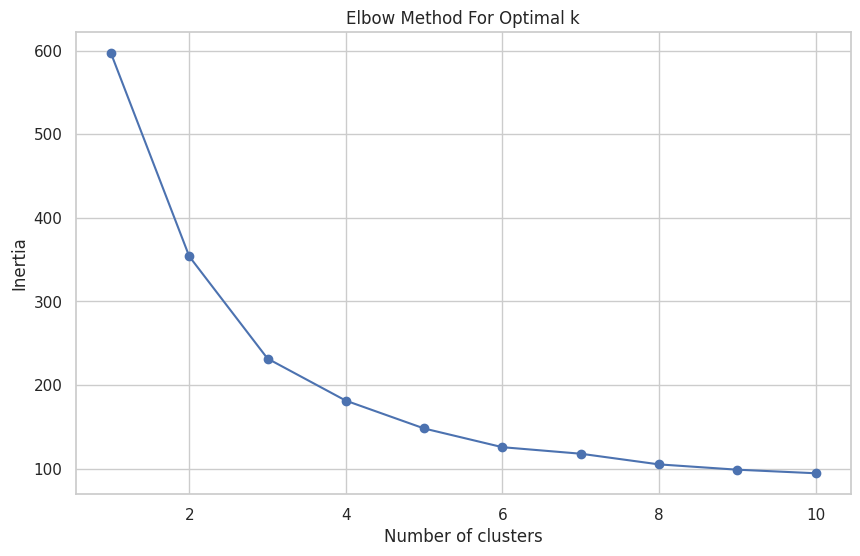

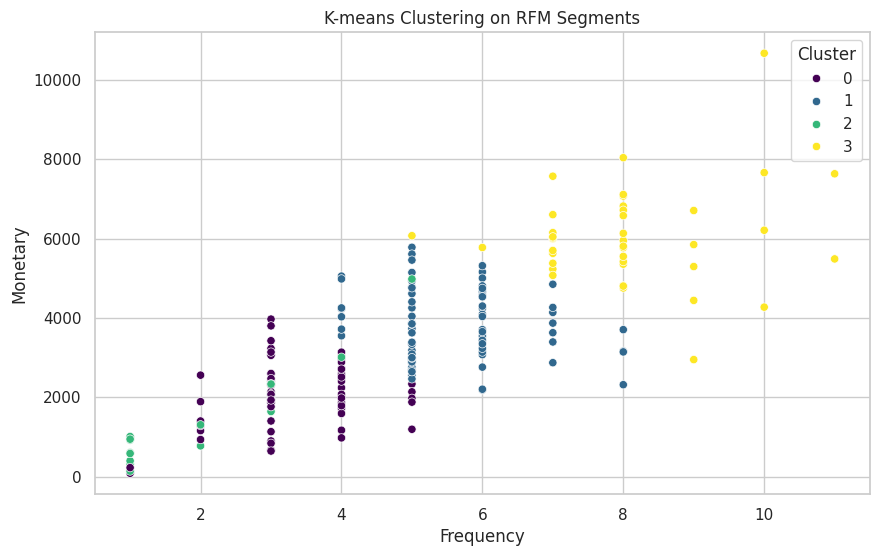

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_table[['Recency', 'Frequency', 'Monetary']])

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=4, random_state=1)
clusters = kmeans.fit_predict(rfm_scaled)
rfm_table['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='Cluster', data=rfm_table, palette='viridis', legend='full')
plt.title('K-means Clustering on RFM Segments')
plt.show()


# Lookalike Model - Approach and Thought Process

## 1. Feature Engineering
- **Monetary**: Total spending by each customer to indicate their value to the business.
- **Frequency**: Number of transactions made by each customer to measure engagement levels.
- **Recency**: Days since the last transaction to capture recent activity.

## 2. Data Standardization
- **Method**: Used `StandardScaler` to ensure Monetary, Frequency, and Recency are on the same scale.
- **Purpose**: Guarantees that all features contribute equally to similarity calculations.

## 3. Weighted Features
- **Weights**: Assigned 0.4 each to Monetary and Frequency (high priority) and 0.2 to Recency (lower priority).
- **Rationale**: Aligns with business priorities by prioritizing high-value and frequent buyers.

## 4. Dimensionality Reduction
- **PCA**: Applied Principal Component Analysis to reduce features to two components while retaining maximum variance.
- **Benefit**: Simplifies similarity computations and improves visualization.

## 5. Cosine Similarity
- **Purpose**: Measures customer similarity based on behavioral patterns in feature space.
- **Advantage**: Ideal for high-dimensional data as it focuses on direction rather than magnitude.

## 6. Generating Lookalikes
- **Method**: For each customer, identified the top 3 most similar customers using cosine similarity scores.
- **Output**: Saved results in a CSV file (`Lookalike.csv`) for further analysis and application.

# Business Advantages
1. **Targeted Marketing**:
   - Identifies similar customer groups for focused and effective marketing campaigns.
   
2. **Upselling and Cross-Selling**:
   - Recommends products popular with similar customers to increase revenue.

3. **Scalability and Customization**:
   - Adjustable feature weights allow the model to adapt to changing business priorities.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

customers = pd.read_csv('Cleaned_Customers.csv')
products = pd.read_csv('Cleaned_Products.csv')
transactions = pd.read_csv('Cleaned_Transactions.csv')

transactions = transactions.merge(customers, on='CustomerID', how='left')
transactions = transactions.merge(products, on='ProductID', how='left')

total_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_spending.rename(columns={'TotalValue': 'Monetary'}, inplace=True)

frequency = transactions.groupby('CustomerID')['TransactionID'].count().reset_index()
frequency.rename(columns={'TransactionID': 'Frequency'}, inplace=True)

latest_date = pd.to_datetime(transactions['TransactionDate']).max()
recency = transactions.groupby('CustomerID')['TransactionDate'].max().reset_index()
recency['TransactionDate'] = pd.to_datetime(recency['TransactionDate'])
recency['Recency'] = (latest_date - recency['TransactionDate']).dt.days
recency = recency[['CustomerID', 'Recency']]

features = total_spending.merge(frequency, on='CustomerID')
features = features.merge(recency, on='CustomerID')

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features[['Monetary', 'Frequency', 'Recency']])

weights = np.array([0.4, 0.4, 0.2])
weighted_features = scaled_features * weights

pca = PCA(n_components=2)
pca_features = pca.fit_transform(weighted_features)

similarity_matrix = cosine_similarity(pca_features)

similarity_df = pd.DataFrame(similarity_matrix, index=features['CustomerID'], columns=features['CustomerID'])

def get_top_lookalikes(similarity_df, cust_id, num_lookalikes=3):
    scores = similarity_df.loc[cust_id].sort_values(ascending=False)[1:num_lookalikes+1]
    return scores.to_dict()

first_20_customers = features['CustomerID'].iloc[:20]
lookalike_results = {
    cust: get_top_lookalikes(similarity_df, cust) for cust in first_20_customers
}

lookalike_df = pd.DataFrame(list(lookalike_results.items()), columns=['CustomerID', 'Lookalikes'])
lookalike_df.to_csv('Lookalike.csv', index=False)

print("Lookalike model execution complete. Results saved to Lookalike.csv.")


Lookalike model execution complete. Results saved to Lookalike.csv.


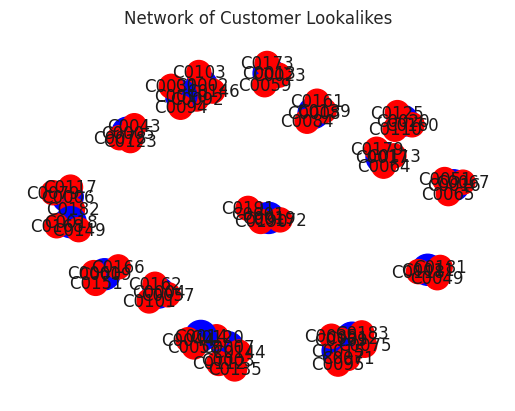

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

lookalike_df = pd.read_csv('Lookalike.csv')

G = nx.Graph()

for index, row in lookalike_df.iterrows():
    main_customer = row['CustomerID']
    lookalikes = eval(row['Lookalikes'])
    for cust, score in lookalikes.items():
        G.add_node(main_customer, color='blue', size=500)  # Main customer node
        G.add_node(cust, color='red', size=300)  # Lookalike customer node
        G.add_edge(main_customer, cust, weight=score)

pos = nx.spring_layout(G, seed=42)

node_color = [nx.get_node_attributes(G, 'color')[node] for node in G]
node_size = [nx.get_node_attributes(G, 'size')[node] for node in G]
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size)

weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, alpha=0.5, width=weights)

nx.draw_networkx_labels(G, pos)

plt.title('Network of Customer Lookalikes')
plt.axis('off')  # Turn off the axis
plt.show()


Model evaluation
1. Evaluation Matrics
2. Logic Validation

In [ ]:
import pandas as pd
import numpy as np

def precision_at_k(true_labels, predicted_labels, k):
    """
    Calculate precision at k.
    Precision at k is the proportion of recommended items in the top-k set that are relevant
    """
    if len(predicted_labels) > k:
        predicted_labels = predicted_labels[:k]
    relevant_items = set(true_labels).intersection(set(predicted_labels))
    precision = len(relevant_items) / len(predicted_labels)
    return precision

def mean_reciprocal_rank(true_labels, predicted_labels_sets):
    """
    Calculate the mean reciprocal rank.
    MRR is the average of the reciprocal ranks of results for a sample of queries
    """
    rr_list = []
    for true_label, predictions in zip(true_labels, predicted_labels_sets):
        try:
            rank = 1 / (predictions.index(true_label) + 1)
        except ValueError:
            rank = 0
        rr_list.append(rank)
    return np.mean(rr_list)

# Example usage:
true_labels = [['C0021', 'C0032', 'C0012']]  # True lookalikes for the customer
predicted_labels_sets = [['C0021', 'C0045', 'C0032']]  # Predicted lookalikes from your model
k = 3

# Calculate precision at k for the first set of predictions
precision = precision_at_k(true_labels[0], predicted_labels_sets[0], k)
print(f'Precision at {k}: {precision}')

# Calculate MRR
mrr = mean_reciprocal_rank(true_labels, predicted_labels_sets)
print(f'Mean Reciprocal Rank: {mrr}')


Precision at 3: 0.6666666666666666
Mean Reciprocal Rank: 0.0


In [ ]:
def check_logic_consistency(customer_profiles, recommendations):
    """
    Function to check logical consistency in recommendations.
    Assuming customer_profiles is a dictionary with customerID as keys and profiles as values.
    """
    inconsistencies = 0
    total_checks = 0
    for main_cust, recs in recommendations.items():
        main_profile = customer_profiles[main_cust]
        for rec in recs:
            rec_profile = customer_profiles[rec]
            if main_profile['Region'] != rec_profile['Region']:
                inconsistencies += 1
            total_checks += 1
    consistency_rate = (total_checks - inconsistencies) / total_checks
    return consistency_rate

customer_profiles = {'C0001': {'Region': 'North'}, 'C0021': {'Region': 'North'}, 'C0045': {'Region': 'South'}}
recommendations = {'C0001': ['C0021', 'C0045']}
consistency_rate = check_logic_consistency(customer_profiles, recommendations)
print(f'Consistency Rate: {consistency_rate}')


Consistency Rate: 0.5


# Customer Segmentation - Approach and Output

## Approach:

### 1. Feature Engineering
- **Metrics Extracted**: RFM metrics (Recency, Frequency, Monetary) and customer region.
- **Categorical Handling**: Applied one-hot encoding to the 'Region' column to incorporate categorical data into the model.

### 2. Data Scaling
- **Method**: Used `StandardScaler` to normalize all features.
- **Purpose**: Ensures equal contribution of features during clustering.

### 3. Elbow Method
- **Objective**: Determined the optimal number of clusters by identifying the "elbow point" on the inertia plot.
- **Result**: Optimal cluster count was found to be **k=4**.

### 4. K-means Clustering
- **Clustering Algorithm**: Implemented K-means to group customers into 4 distinct clusters.
- **Evaluation Metrics**:
  - **Davies-Bouldin Index**: 0.4381 (indicates well-separated clusters).
  - **Silhouette Score**: 0.7124 (indicates compact and distinct clusters).

### 5. PCA Visualization
- **Dimensionality Reduction**: Used PCA to reduce feature space to 2 dimensions for visualization.
- **Outcome**: Clear cluster separation shown in a 2D scatter plot.

## Output:
- **Results File**: Clustering results saved as `Customer_Segments.csv` for further analysis.
- **Behavioral Insights**: Clusters reflect distinct behavioral patterns for targeted segmentation and marketing.

---

## Business Insights:

1. **Targeting High-Value Clusters**:
   - Personalize campaigns for high-value clusters to maximize revenue and customer loyalty.

2. **Re-Engaging Low-Value Clusters**:
   - Use promotions, discounts, or onboarding improvements to increase retention and engagement.

3. **Adaptability Through Re-Clustering**:
   - Periodically re-cluster to capture dynamic shifts in customer behavior and refine marketing strategies.

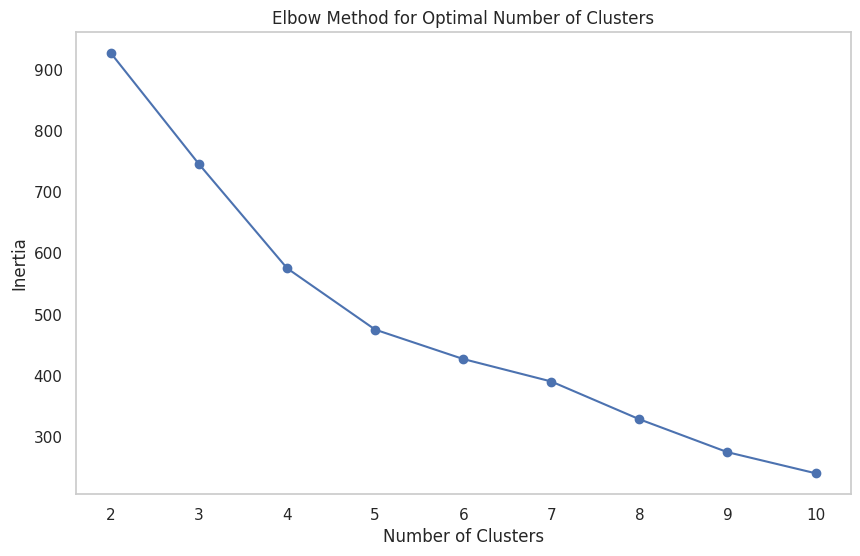

Davies-Bouldin Index (DB Index): 1.1447
Silhouette Score: 0.3391


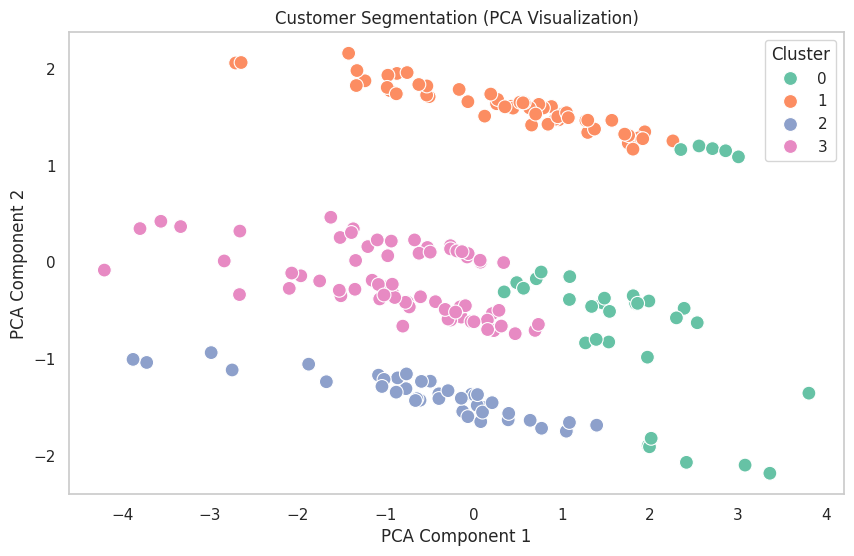

Clustering results saved to Customer_Segments.csv.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Cleaned_Customers.csv')
transactions = pd.read_csv('Cleaned_Transactions.csv')

transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
latest_date = transactions['TransactionDate'].max()

total_spending = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
total_spending.rename(columns={'TotalValue': 'Monetary'}, inplace=True)

frequency = transactions.groupby('CustomerID')['TransactionID'].count().reset_index()
frequency.rename(columns={'TransactionID': 'Frequency'}, inplace=True)

recency = transactions.groupby('CustomerID')['TransactionDate'].max().reset_index()
recency['Recency'] = (latest_date - recency['TransactionDate']).dt.days
recency = recency[['CustomerID', 'Recency']]

features = total_spending.merge(frequency, on='CustomerID')
features = features.merge(recency, on='CustomerID')

features = features.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

features = pd.get_dummies(features, columns=['Region'], drop_first=True)

X = features.drop(columns=['CustomerID'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
cluster_range = range(2, 11)
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
features['Cluster'] = clusters

db_index = davies_bouldin_score(X_scaled, clusters)
silhouette_avg = silhouette_score(X_scaled, clusters)

print(f'Davies-Bouldin Index (DB Index): {db_index:.4f}')
print(f'Silhouette Score: {silhouette_avg:.4f}')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=features['Cluster'], palette='Set2', s=100)
plt.title('Customer Segmentation (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

features.to_csv('Customer_Segments.csv', index=False)
print("Clustering results saved to Customer_Segments.csv.")
